In [1]:
using Plots
using DelimitedFiles
using LaTeXStrings

include("TN_Superfermionic_Mesoscopic_Leads/Code/Interacting_functions.jl")

This package is totally compatible with gpu. If you want to use GPU, just define GPU = true as a global variable in your code.


Energy_Current_HS_time_dependent

In [4]:
precompile_package("TN_Superfermionic_Mesoscopic_Leads", false)

The package has been precompiled for GPU = false.
  1.448714 seconds (13.02 M allocations: 3.715 GiB, 10.65% gc time)


In [5]:
precompile_package("TN_Superfermionic_Mesoscopic_Leads", true)

Effective GPU memory usage: 14.92% (1.193 GiB/7.996 GiB)
Memory pool usage: 3.134 MiB (32.000 MiB reserved)
The package has been precompiled for GPU = true.
 10.521783 seconds (25.50 M allocations: 4.014 GiB, 5.51% gc time)


In [101]:
L = 10
D = 4
R_dict = Dict()
C_dict = Dict()
JF_dict = Dict()
JR_dict = Dict()
time_dict = Dict()

E_values = []

for E = 0.2:0.2:3.8; append!(E_values, E); end
# for E = 4.0:0.025:6.0; append!(E_values, E); end
for E = 4.0:0.2:6.0; append!(E_values, E); end
for E =  6.2:0.2:9.8; append!(E_values, E); end

# Folder = "/jet/home/penuelap/Heat_rectification_Data/" #PSC
Folder = "Local_Data/U=10 ΔT (Thot= 1000 and Tcold=1)/" #MSI

for Current = ["JE", "JP"]
    R_values = []
    C_values = []
    JF_dict[Current] = Dict()
    JR_dict[Current] = Dict()
    
    for E = E_values

        E = Float64(E)
        D = Int64(D)

        Name = "_E=$E"*"_L=$L"*"_D=$D"

        J_F = readdlm(Folder*"Forward"*Name*"_NESS_$Current.txt")
        J_R = readdlm(Folder*"Reverse"*Name*"_NESS_$Current.txt")
        time = readdlm(Folder*"Reverse"*Name*"_NESS_time.txt")

        #Save rectification coefficient into a dict to save it.
        # abs(J_F[end]) > abs(J_R[end]) ? R = abs(J_F[end]/J_R[end]) : R = abs(J_R[end]/J_F[end])

        # R = -J_F[end]/J_R[end]
        R = -J_R[end]/J_F[end]
        append!(R_values, R)      

        C = abs((J_F[end] + J_R[end])/(J_F[end] - J_R[end]))
        append!(C_values, C)      
        # Generate plots

        plot(time, J_R, color = "blue", label = "Reverse")
        plot!(time, J_F, color = "red", label = "Forward")
        hline!([0], linestyle = :dash, color = "gray", label = false, alpha = 0.5)
        title!("E=$E"*", L=$L"*", D=$D")
        Current == "JE" ? ylabel!("Energy Current "*L"J_{E}") : ylabel!("Particle Current "*L"J_{P}")
        R = round(R; digits = 5)
        annotate!(time[end]/2, 0.0 , L"R = "*"$R")   

        # xlims!(40, 50)
        # ylims!(-0.2, 0.2)
        # annotate!(45.0, 0.0 , L"R = "*"$R")   
        # savefig(Folder*"Results"*Name*"_$Current.pdf")      

        JF_dict[Current][E] = J_F
        JR_dict[Current][E] = J_R
        Current == "JE" ? time_dict[E] = time : nothing
    end
    R_dict[Current] = R_values
    C_dict[Current] = C_values

end

(R_max, indmax) = findmax(R_dict["JE"]) = (4.615422129253471, 21)


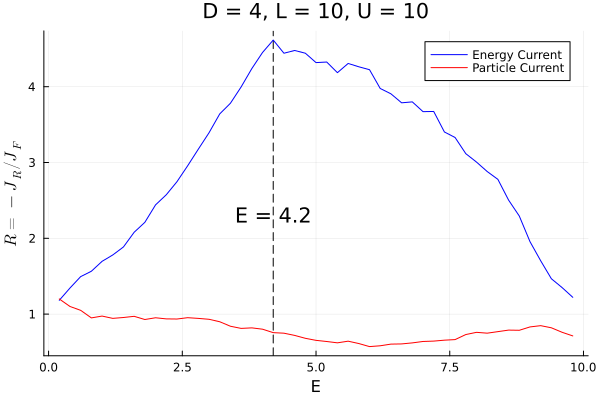

In [102]:
#Rectification coefficient.
@show R_max, indmax = findmax(R_dict["JE"])
vline([E_values[indmax]], label = false, linestyle = :dash, color = "black")
annotate!([E_values[indmax]], [R_max/2], "E = $(E_values[indmax])")

plot!(E_values, R_dict["JE"], xlabel = "E", label = "Energy Current", color = "blue")
plot!(E_values, R_dict["JP"], label = "Particle Current", color = "red")

# scatter!(E_values, R_dict["JE"], xlabel = "E", label = "Energy Current", color = "blue")
# scatter!(E_values, R_dict["JP"], label = "Particle Current", color = "red")

title!("D = $D, L = 10, U = 10")
ylabel!(L"R = -J_{R}/J_{F}")
# savefig(Folder*"R (JR bigger) Coefficient vs E.pdf")

(C_max, indmax) = findmax(C_dict["JE"]) = (0.6438379957971414, 21)


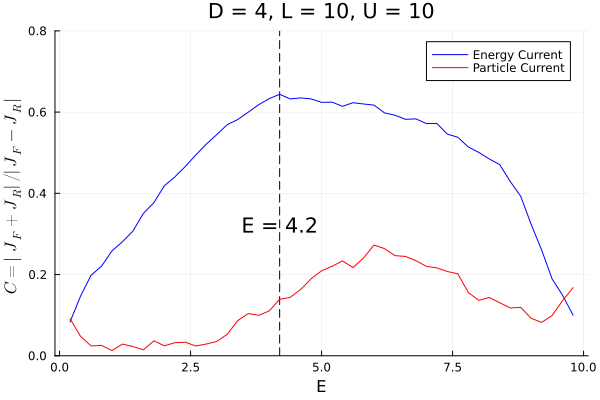

In [103]:
#Rectification coefficient.

@show C_max, indmax = findmax(C_dict["JE"])
vline([E_values[indmax]], label = false, linestyle = :dash, color = "black")
annotate!([E_values[indmax]], [C_max/2], "E = $(E_values[indmax])")

plot!(E_values, C_dict["JE"], xlabel = "E", label = "Energy Current", color = "blue")
plot!(E_values, C_dict["JP"], label = "Particle Current", color = "red")

# scatter!(E_values, C_dict["JE"], xlabel = "E", label = "Energy Current", color = "blue")
# scatter!(E_values, C_dict["JP"], label = "Particle Current", color = "red")

title!("D = $D, L = 10, U = 10")
ylabel!(L"C =\left|J_{F}+J_{R}|/|J_{F}-J_{R}\right|")
ylims!(0, 0.8)

# savefig(Folder*"C Coefficient vs E.pdf")

J_F = ((JF_dict[Current])[E])[end] = 0.01861123650103276
J_R = ((JR_dict[Current])[E])[end] = -0.08589871279963654
R = round(R; digits = 5) = 4.61542


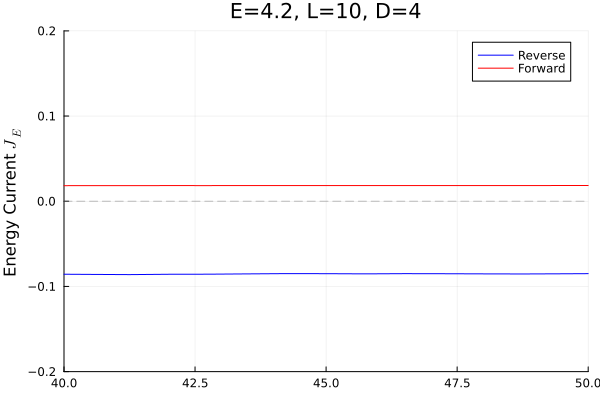

In [104]:
E = E_values[indmax]
Current = "JE"

plot(time_dict[E], JR_dict[Current][E], color = "blue", label = "Reverse")
plot!(time_dict[E], JF_dict[Current][E], color = "red", label = "Forward")
hline!([0], linestyle = :dash, color = "gray", label = false, alpha = 0.5)
@show J_F = JF_dict[Current][E][end] 
@show J_R = JR_dict[Current][E][end]

abs(J_F) > abs(J_R) ? R = abs(J_F/J_R) : R = abs(J_R/J_F)
@show R = round(R; digits = 5)
annotate!(time_dict[E][end]/2, 0.0 , L"R = "*"$R")
title!("E=$E"*", L=$L"*", D=$D")
Current == "JE" ? ylabel!("Energy Current "*L"J_{E}") : ylabel!("Particle Current "*L"J_{P}")

#zoom?
xlims!(40, 50)
ylims!(-0.2, 0.2)

In [15]:
E_values = 0.2:0.2:9.8

GPU = true

Occupations_F = Dict()
Occupations_R = Dict()

for E = E_values

    Name = "_E=$E"*"_L=$L"*"_D=$D"    

    begin @time for direction = ["Forward", "Reverse"]

        f = h5open(Folder*direction*Name*"_NESS_MPS.h5")
        NESS = read(f,"MPS", MPS)
        close(f)

        GPU == true ? NESS = gpu(NESS) : nothing
        
        sites = siteinds(NESS)
        I_vec = Build_left_vacuum(sites)
        direction == "Forward" ? Occupations_F[E] = Occupations_per_site(NESS, I_vec) : Occupations_R[E] = Occupations_per_site(NESS, I_vec)
    end
    end
    println("E = $E occupation calculation has finished")
end

 10.453178 seconds (4.99 M allocations: 561.226 MiB, 1.13% gc time, 23.40% compilation time)
E = 0.2 occupation calculation has finished
  7.844386 seconds (3.04 M allocations: 431.148 MiB, 0.66% gc time)
E = 0.4 occupation calculation has finished
  7.628058 seconds (3.04 M allocations: 431.167 MiB, 0.68% gc time)
E = 0.6 occupation calculation has finished
  7.752423 seconds (3.04 M allocations: 431.180 MiB, 0.72% gc time)
E = 0.8 occupation calculation has finished
  7.723152 seconds (3.04 M allocations: 431.205 MiB, 0.79% gc time)
E = 1.0 occupation calculation has finished
  7.385041 seconds (3.04 M allocations: 431.212 MiB, 0.73% gc time)
E = 1.2 occupation calculation has finished
  7.239946 seconds (3.04 M allocations: 431.224 MiB, 0.68% gc time)
E = 1.4 occupation calculation has finished
  7.103549 seconds (3.04 M allocations: 431.220 MiB, 0.67% gc time)
E = 1.6 occupation calculation has finished
  6.946424 seconds (3.04 M allocations: 431.241 MiB, 0.92% gc time)
E = 1.8 occ

In [16]:
Occupations_F[1.2]

24-element Vector{Any}:
 0.5020622674582675
 0.5015862166738305
 0.5026133722447427
 0.5031751039933346
 0.4992824406748729
 0.49655633016839656
 0.4973530584840358
 0.498374518715161
 0.4985799990254255
 0.4965273778764485
 0.47420828680310456
 0.44486877562253907
 0.39030737945063493
 0.2856375945331902
 0.9963307140038974
 0.9784929757177255
 0.9396355990663585
 0.8356833028756687
 0.6249560544072393
 0.3655609579965735
 0.16899137784708224
 0.06560732212256433
 0.023170683263077682
 0.005861009752705221

In [17]:
#Occupation plots

for direction = ["Forward", "Reverse"]

    direction == "Forward" ? Occupations = Occupations_F : Occupations = Occupations_R
    # plot()
    for E = E_values
    
        scatter(1:1:L, Occupations[E][1:L], label = "L")
        scatter!(L+1:1:L+D, Occupations[E][L+1:L+D], label = "S")
        scatter!(L+D+1:1:L+D+L, Occupations[E][L+D+1:L+D+L], label = "R")
    
        title!("E = $E")
        xlabel!("Physical site i")
        ylabel!(L"\langle N_{i} \rangle")
        
        savefig(Folder*"Occupation $direction $E = $E.pdf")
    end
end

In [26]:
using LinearAlgebra
using FlexiMaps
#Energy per site plots

W = 18.0
Γ = W/8
J(ω) = abs(ω) <= abs(W) ? Γ : 0 #Spectral density Γ = W/8 in this case
μ_L, μ_R = 0.0, 0.0 #As we want to focus in Heat rectification, we should not have gradient of chemical potential.

function Logarithmic_linear_arrays(L, J)
    #L: lead size
    #J: Spectral density    
    
    #We need to define εk for the lead. In particular, we use the logarithmic-linear discretization of the paper. As this is just for the article, it is not worthy to put it with the other functions in NonInteacting_functions.jl
    
    W_log = W #W
    W_lin = W_log/2 #W* = W/2
    
    L_log = L*0.2
    L_lin = L - L_log
    
    Lin_Window = LinRange(-W_lin, W_lin, Int(L_lin))
    Log_Window = maprange(log, W_lin, W_log, length=Int(L_log/2 + 1))
    
    εk = Float64[]
    append!(εk, -reverse( Log_Window[2:length(Log_Window)]), Lin_Window, Log_Window[2:length(Log_Window)])
    
    γk = [εk[k+1] - εk[k] for k=1:Int(L/2)]
    append!(γk, reverse(γk))

    κkp = ComplexF64[sqrt(J(εk[k])*γk[k]/(2.0*pi)) for k=1:L] #Kp = sqrt(J(e)*γ/(2*pi))

    return εk, γk,  κkp
end

Logarithmic_linear_arrays (generic function with 1 method)

In [ ]:
L, R = 10, 10
D = 4

for direction = ["Forward", "Reverse"]

    direction == "Forward" ? Occupations = Occupations_F : Occupations = Occupations_R
    εk, γk, κp = Logarithmic_linear_arrays(L, J)  
    
    for E = E_values

        μ = -E*(D+1)/4
        ε_system = [(μ+0.5E*j) for j =1:D]; #Tilted system energies
        
        scatter(1:1:L, Occupations[E][1:L].*εk, label = "L")
        scatter!(L+1:1:L+D, Occupations[E][L+1:L+D].*ε_system, label = "S")
        scatter!(L+D+1:1:L+D+L, Occupations[E][L+D+1:L+D+L].*εk, label = "R")
    
        title!("E = $E")
        xlabel!("Physical site i")
        ylabel!(L"\langle N_{i} \rangle")
        
        savefig(Folder*"Energy per site $direction $E = $E.pdf")
    end
end

Let's check that the energies of the system are between the energies of the leads.

In [110]:
E_values = 0.2:0.2:10.0

for D = [4, 6, 8]
    for E = E_values
    
        μ = -E*(D+1)/4
        ε_system = [(μ+0.5E*j) for j =1:D]; #Tilted system energies
        @show D, E, maximum(ε_system), minimum(ε_system)
    end
end


(D, E, maximum(ε_system), minimum(ε_system)) = (4, 0.2, 0.15000000000000002, -0.15)
(D, E, maximum(ε_system), minimum(ε_system)) = (4, 0.4, 0.30000000000000004, -0.3)
(D, E, maximum(ε_system), minimum(ε_system)) = (4, 0.6, 0.44999999999999996, -0.45)
(D, E, maximum(ε_system), minimum(ε_system)) = (4, 0.8, 0.6000000000000001, -0.6)
(D, E, maximum(ε_system), minimum(ε_system)) = (4, 1.0, 0.75, -0.75)
(D, E, maximum(ε_system), minimum(ε_system)) = (4, 1.2, 0.8999999999999999, -0.9)
(D, E, maximum(ε_system), minimum(ε_system)) = (4, 1.4, 1.0499999999999998, -1.05)
(D, E, maximum(ε_system), minimum(ε_system)) = (4, 1.6, 1.2000000000000002, -1.2)
(D, E, maximum(ε_system), minimum(ε_system)) = (4, 1.8, 1.35, -1.35)
(D, E, maximum(ε_system), minimum(ε_system)) = (4, 2.0, 1.5, -1.5)
(D, E, maximum(ε_system), minimum(ε_system)) = (4, 2.2, 1.6500000000000004, -1.65)
(D, E, maximum(ε_system), minimum(ε_system)) = (4, 2.4, 1.7999999999999998, -1.8)
(D, E, maximum(ε_system), minimum(ε_system)) = (4,